In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Data Science ICARO/Datasets/WorldCups.csv')

Trabajaremos sobre un dataset en el que se recopilan datos sobre la historia de "FIFA World Cup" desde 1930 hasta 2014 :(

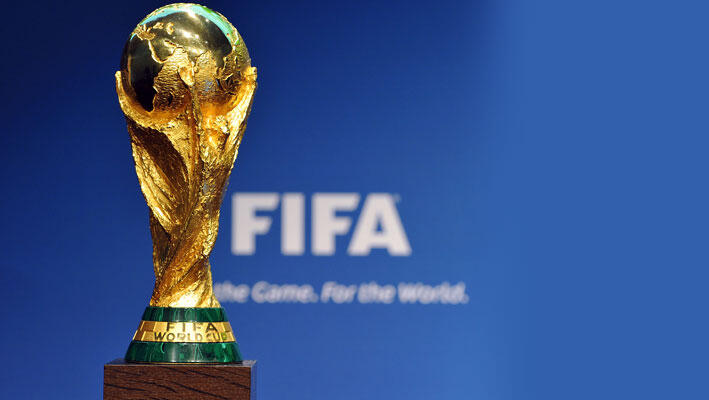

**Context**

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

**Content**

The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

**Acknowledgements**

This data is courtesy of the FIFA World Cup Archive website.

Veamos: ¿Con qué datos contamos y qué significan cada una de las columnas de este DataFrame?

In [ ]:
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Las columnas con las que contamos son:

- **Year:** año en el que se realizó el evento.
- **Country:** sede del mundial.
- **Winner:** equipo/país ganador.
- **Runners-Up:** equipo/país que quedó en segundo lugar.
- **Third:** equipo/país que quedó en tercer lugar.
- **Fourth:** equipo/país que quedó en cuarto lugar.
- **GoalsScored:** cantidad de goles en total anotados a lo largo de la Copa.
- **QualifiedTeams:** cantidad de equipos que participaron.
- **MatchesPlayed:** cantidad de partidos jugados.
- **Attendance:** cantidad de personas (público) que asistieron al evento.

¿Qué tipo de datos contienen las columnas?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


Luego de ver la info, nos damos cuenta de que seguramente necesitemos luego que la variable "Attendance" sea de tipo int.


In [ ]:
df['Attendance'] = df['Attendance'].apply(lambda x: int(str(x).replace(".", "")))
df['Attendance']

0      590549
1      363000
2      375700
3     1045246
4      768607
5      819810
6      893172
7     1563135
8     1603975
9     1865753
10    1545791
11    2109723
12    2394031
13    2516215
14    3587538
15    2785100
16    2705197
17    3359439
18    3178856
19    3386810
Name: Attendance, dtype: int64

Vemos en la próxima línea que se cambió correctamente el tipo de variable:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


Veamos la diferencia con los mundiales de los últimos años:


In [ ]:
df.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810


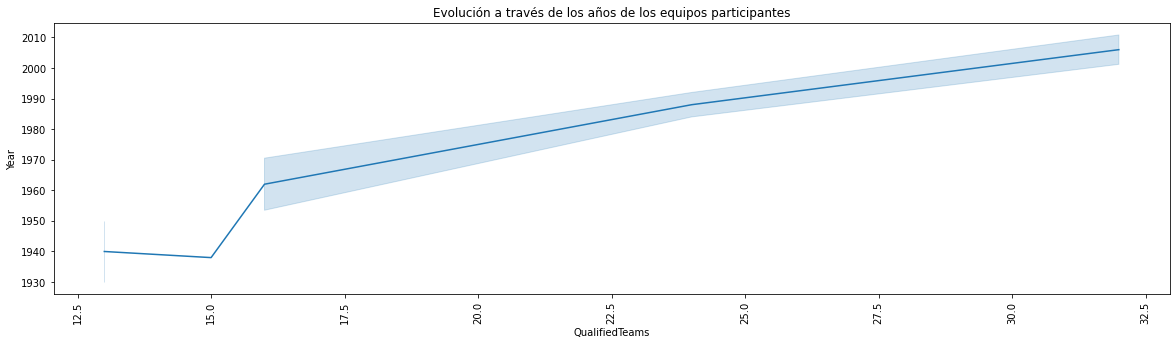

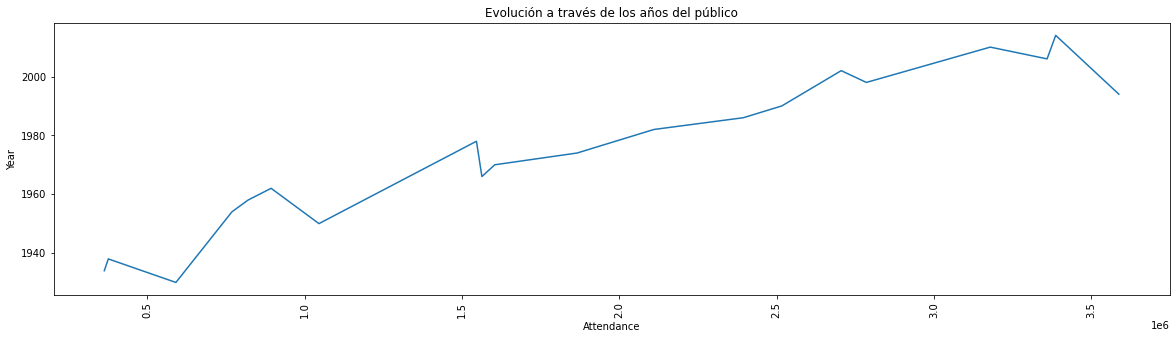

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x = 'QualifiedTeams', y = 'Year', data = df)
plt.xticks(rotation=90)
plt.title("Evolución a través de los años de los equipos participantes")
plt.show()

fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x = 'Attendance', y = 'Year', data = df)
plt.xticks(rotation=90)
plt.title("Evolución a través de los años del público")
plt.show()

Al ver las últimas filas y los gráficos que complementan, podemos notar cómo se duplicó la cantidad de equipos que participan y cómo aumentó considerablemente la asistencia del público.

¿Cuántas filas tiene el dataset?

In [ ]:
df.shape[0]

20

¿Y columnas?

In [ ]:
df.shape[1]

10

Sabemos de antemano que no debería tener valores nulos, verifiquemos:

In [ ]:
df.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [ ]:
df.head(0)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


Separemos las variables en numéricas y categóricas:

*NUMÉRICAS*

- Year
- GoalsScored
- QualifiedTeams
- MatchesPlayed
- Attendance

*CATEGÓRICAS*

- Country
- Winner
- Runners-Up
- Third
- Fourth

### ***ANÁLISIS DE LAS VARIABLES CATEGÓRICAS***

###¿Cuántos valores únicos hay en cada columna de las categóricas?
(Veremos las categorías que más nos interesan)

In [ ]:
df['Country'].nunique()

15

In [ ]:
df['Winner'].nunique()

9

In [ ]:
df['Runners-Up'].nunique()

10

###¿Qué países salieron campeones al menos una vez?

In [ ]:
print(df['Winner'].unique())

['Uruguay' 'Italy' 'Germany FR' 'Brazil' 'England' 'Argentina' 'France'
 'Spain' 'Germany']


En la celda de arriba podemos ver que en nuestro df tenemos un posible duplicado, si bien antes existía una distinción entre la Alemania Federal y la Democrática, para la fecha se lo considera un solo país, por lo que el número de victorias no debería estar separado.

Por este motivo, modificaremos el valor de *Germany FR*, a solo *Germany*:


In [ ]:
df = df.replace({"Germany FR": "Germany"})
df.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


Ahora si volvemos a imprimir los ganadores, veremos que:

In [ ]:
print(df['Winner'].unique())

['Uruguay' 'Italy' 'Germany' 'Brazil' 'England' 'Argentina' 'France'
 'Spain']


###¿Qué país tiene más mundiales ganados?


In [ ]:
top_winner = df.groupby(['Winner']).Country.count().sort_values(ascending = False)
top_winner

Winner
Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Country, dtype: int64

###Vamos a ver la gráfica de este resultado:

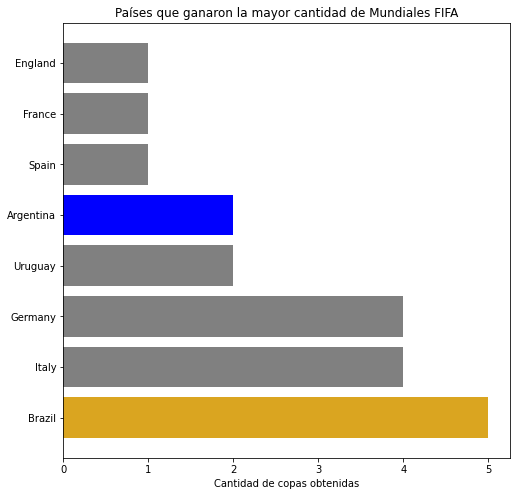

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()

ax.barh(y = top_winner.index, width = top_winner.values, color = 'grey')  
ax.barh(y = top_winner.index[4:5], width = top_winner.values[4:5], color = 'blue')
ax.barh(y = top_winner.index[:1], width = top_winner.values[:1], color = 'goldenrod')
ax.set_title('Países que ganaron la mayor cantidad de Mundiales FIFA')
ax.set_xlabel('Cantidad de copas obtenidas')
plt.show()

###¿Quién quedó en segundo puesto más veces? (Sub-campeón)

In [ ]:
df.groupby(['Runners-Up']).Country.count().sort_values(ascending = False)

Runners-Up
Germany           4
Netherlands       3
Argentina         3
Italy             2
Hungary           2
Czechoslovakia    2
Brazil            2
Sweden            1
France            1
Name: Country, dtype: int64

###¿En cuántas oportunidades se dio que salió campeón el país anfitrión?


In [ ]:
df1 = df.copy()
df_home_winner = df1[(df['Country'] == df['Winner'])]
df_home_winner

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1545791
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100


In [ ]:
df_home = df_home_winner.shape[0]

print(f'En', df_home, 'oportunidades se cumplió que el país anfitrión sea el campeón.')

En 6 oportunidades se cumplió que el país anfitrión sea el campeón.


###¿En qué años salió campeón Argentina?

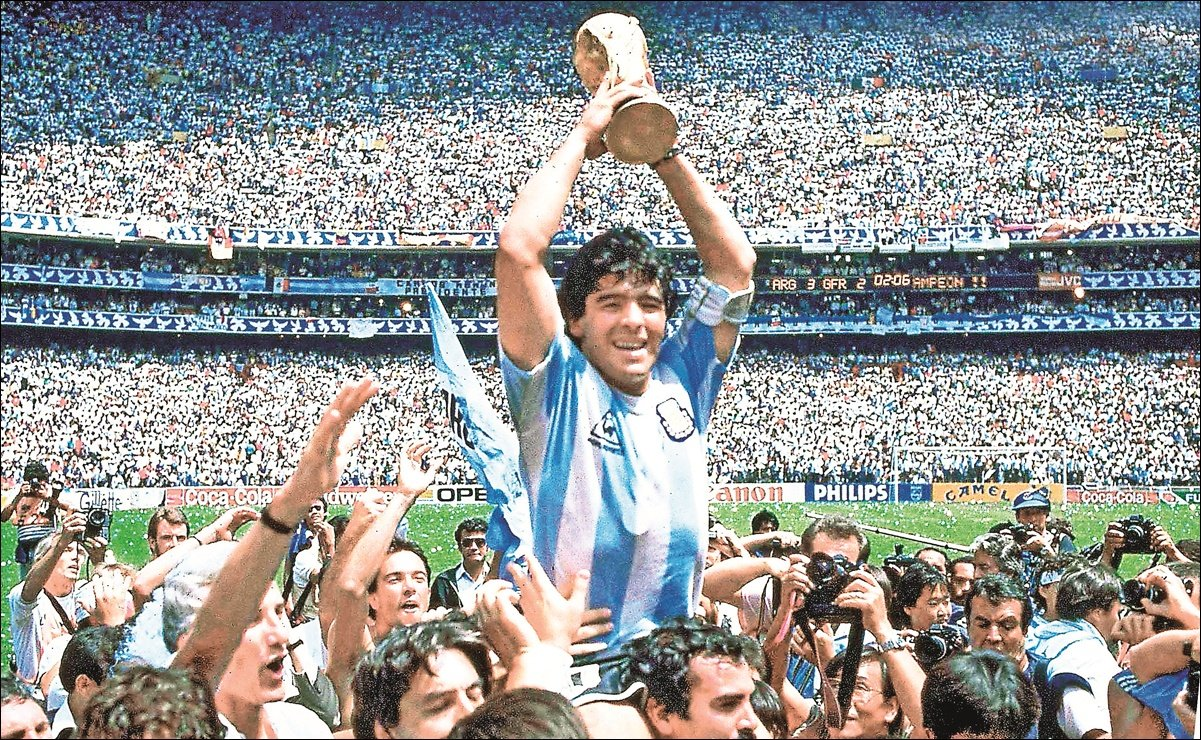

In [ ]:
array = df[(df.Winner == 'Argentina')]['Year'].values
print(f'Argentina salió campeón en los años: ',array)

Argentina salió campeón en los años:  [1978 1986]


###Veamos cómo se distribuyen estas variables:


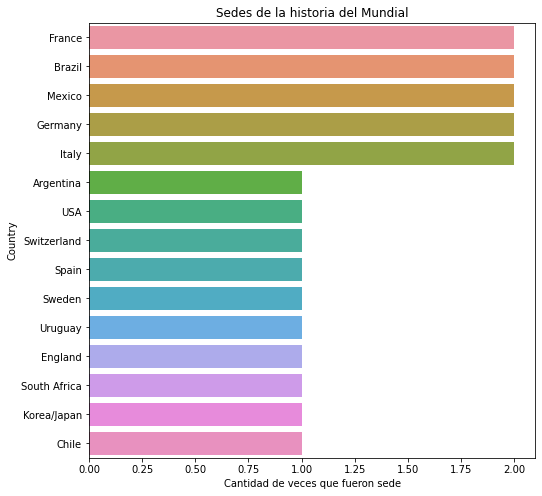

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
ax = sns.countplot(y = 'Country', data = df, order = df.Country.value_counts().index)
ax.set_title('Sedes de la historia del Mundial')
ax.set_xlabel('Cantidad de veces que fueron sede')
plt.show()

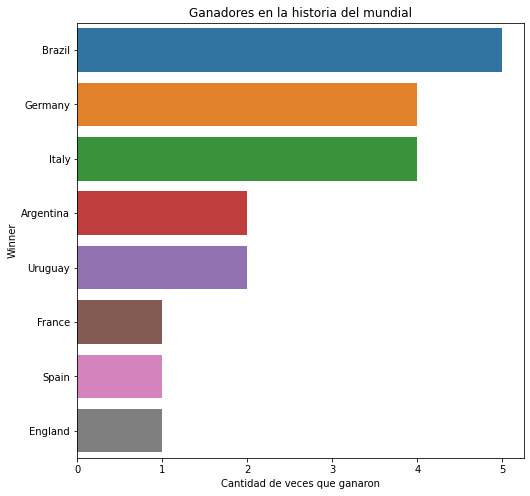

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
ax = sns.countplot(y = 'Winner', data = df, order = df.Winner.value_counts().index)
ax.set_title('Ganadores en la historia del mundial')
ax.set_xlabel('Cantidad de veces que ganaron')
plt.show()

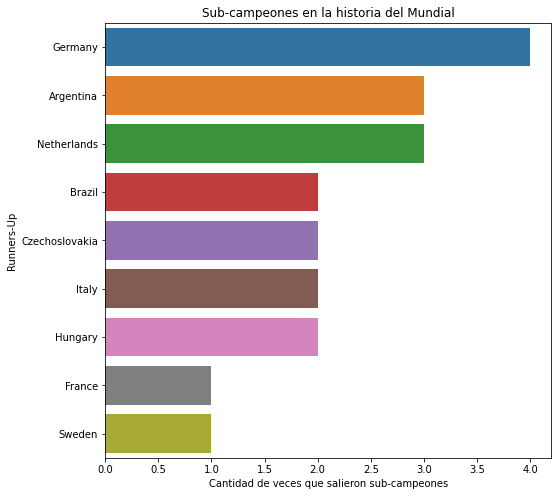

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
ax = sns.countplot(y = 'Runners-Up', data = df, order = df['Runners-Up'].value_counts().index)
ax.set_title('Sub-campeones en la historia del Mundial')
ax.set_xlabel('Cantidad de veces que salieron sub-campeones')
plt.show()

###***ANÁLISIS DE LAS VARIABLES NUMÉRICAS***

In [ ]:
df.head(0)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


###¿Cómo se distribuyen?

####GoalsScored

In [ ]:
df.GoalsScored.describe()

count     20.000000
mean     118.950000
std       32.972836
min       70.000000
25%       89.000000
50%      120.500000
75%      145.250000
max      171.000000
Name: GoalsScored, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


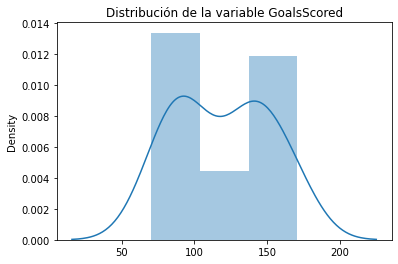

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x = df.GoalsScored)
ax.set_title("Distribución de la variable GoalsScored")
plt.show()

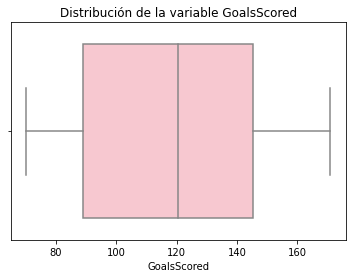

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x = df.GoalsScored, color = 'pink')
ax.set_title("Distribución de la variable GoalsScored")
plt.show()

####QualifiedTeams

In [ ]:
df.QualifiedTeams.describe()

count    20.000000
mean     21.250000
std       7.268352
min      13.000000
25%      16.000000
50%      16.000000
75%      26.000000
max      32.000000
Name: QualifiedTeams, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


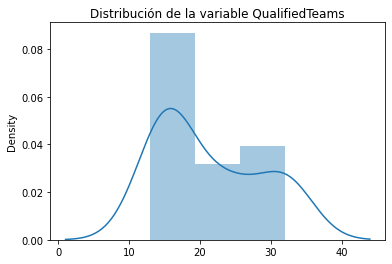

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x = df.QualifiedTeams)
ax.set_title("Distribución de la variable QualifiedTeams")
plt.show()

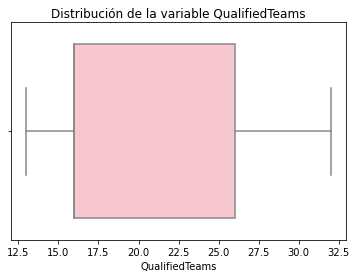

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x = df.QualifiedTeams, color = 'pink')
ax.set_title("Distribución de la variable QualifiedTeams")
plt.show()

MatchesPlayed

In [ ]:
df.MatchesPlayed.describe()

count    20.000000
mean     41.800000
std      17.218717
min      17.000000
25%      30.500000
50%      38.000000
75%      55.000000
max      64.000000
Name: MatchesPlayed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


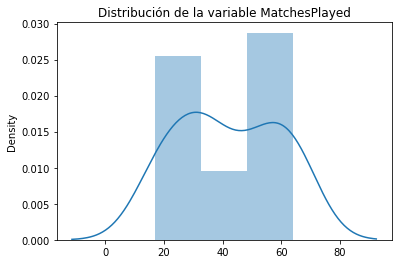

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x = df.MatchesPlayed)
ax.set_title("Distribución de la variable MatchesPlayed")
plt.show()

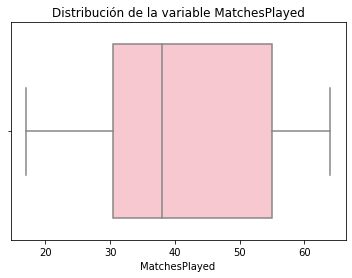

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x = df.MatchesPlayed, color = 'pink')
ax.set_title("Distribución de la variable MatchesPlayed")
plt.show()

####Attendance

In [ ]:
df.Attendance.describe()

count    2.000000e+01
mean     1.872882e+06
std      1.071842e+06
min      3.630000e+05
25%      8.748315e+05
50%      1.734864e+06
75%      2.725173e+06
max      3.587538e+06
Name: Attendance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


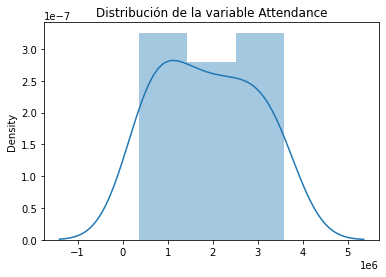

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x = df.Attendance)
ax.set_title("Distribución de la variable Attendance")
plt.show()

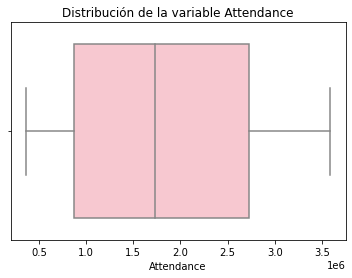

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x = df.Attendance, color = 'pink')
ax.set_title("Distribución de la variable Attendance")
plt.show()

In [ ]:
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


#**Relación entre las variables**

###Veamos la correlación entre las variables

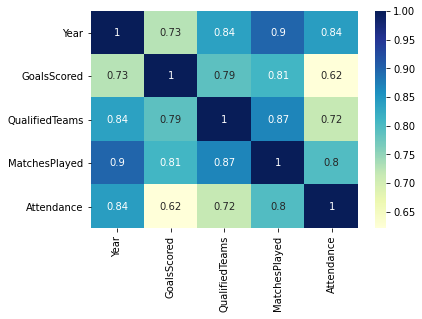

In [ ]:
sns.heatmap(df.corr(method = 'kendall'), annot = True, cmap="YlGnBu")
plt.show()

Vamos a remover la variable 'Year' debido a que no tiene gran importancia en nuestro análisis.

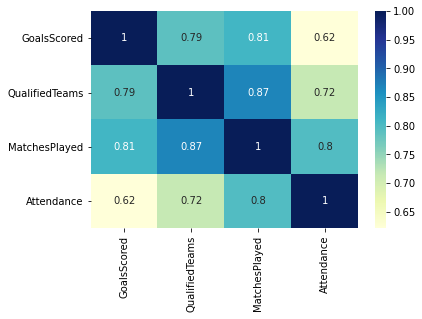

In [ ]:
df_corr = df[['GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']]
sns.heatmap(df_corr.corr(method = 'kendall'), annot = True, cmap="YlGnBu")
plt.show()

Al ser un gráfico en el que vemos que es simétrico en cuanto a la diagonal, podemos eliminar la mitad superior para que sea más claro.

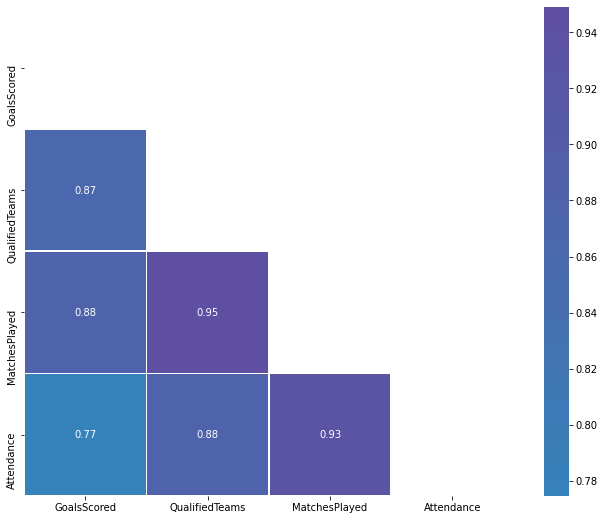

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr.corr(), mask=mask, cmap= 'Spectral', center=0,
            square=True, linewidths=.5, annot = True)

In [ ]:
df_corr.corr()

,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
GoalsScored,1.000000,0.866201,0.876201,0.774670
QualifiedTeams,0.866201,1.000000,0.949164,0.875360
MatchesPlayed,0.876201,0.949164,1.000000,0.933243
Attendance,0.774670,0.875360,0.933243,1.000000


Luego de analizar el gráfico y la matriz, vemos que la correlación más alta se presenta con las variables MatchesPlayed - QualifiedTeams. Esto tiene mucha lógica y es esperable debido a que claramente al haber más equipos participando, se deberán realizar más partidos para llegar a los resultados finales.

Para que quede lo más claro posible, veamos a continuación cómo se relacionan estas variables:

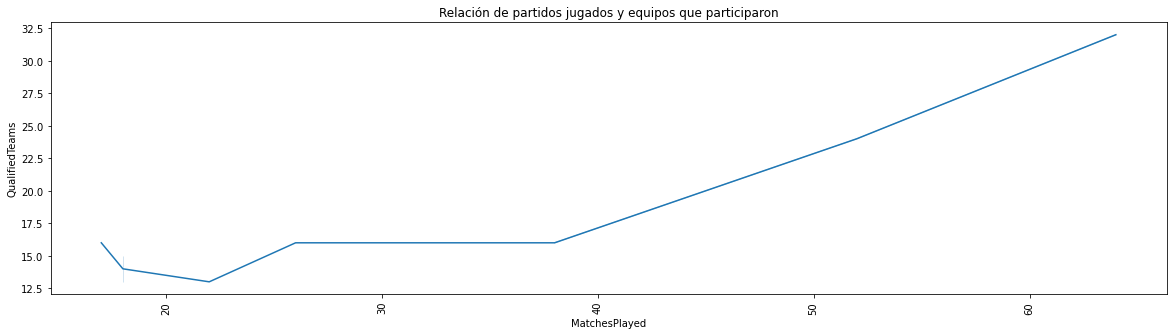

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x='MatchesPlayed', y='QualifiedTeams', data = df)
plt.xticks(rotation=90)
plt.title("Relación de partidos jugados y equipos que participaron")
plt.show()

In [ ]:
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


####¿En qué año se anotaron más goles?

In [ ]:
sort_df = df.sort_values(by = ['GoalsScored', 'Year'], ascending = False).reset_index()
sort_df.loc[:,['Year', 'GoalsScored']]

,Year,GoalsScored
0,2014,171
1,1998,171
2,2002,161
3,2006,147
4,1982,146
5,2010,145
6,1994,141
7,1954,140
8,1986,132
9,1958,126


In [ ]:
max_of_goals = sort_df.loc[0, 'GoalsScored']
max_of_goals

171

In [ ]:
year_most_goals = sort_df.loc[1, 'Year']
year2_most_goals = sort_df.loc[0, 'Year']
print(f'Los años en los que se anotaron más goles fueron en:',  year_most_goals, 'y', year2_most_goals,'. En total fueron:', max_of_goals, 'en ambos años')

Los años en los que se anotaron más goles fueron en: 1998 y 2014 . En total fueron: 171 en ambos años


####¿A partir de qué año se empezó a realizar el campeonato con 32 equipos participantes?

In [ ]:
df2 = df.copy()

In [ ]:
df_teams = df2[(df['QualifiedTeams'] == 32)].reset_index()
df_teams

,index,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
1,16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
2,17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
3,18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
4,19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810


In [ ]:
year_teams = df_teams.loc[0, 'Year']
print(f'A partir del año', year_teams, 'el Mundial se juega con 32 países participantes.')

A partir del año 1998 el Mundial se juega con 32 países participantes.


Luego de hacer esto, vemos claramente que a partir de ese año (1998) la cantidad de partidos disputados es el doble que la cantidad de países participantes. 

Podemos ver esto graficado a continuación:

In [ ]:
df_teams_corr = df[['QualifiedTeams', 'MatchesPlayed']]
df_teams_corr.corr()

,QualifiedTeams,MatchesPlayed
QualifiedTeams,1.000000,0.949164
MatchesPlayed,0.949164,1.000000


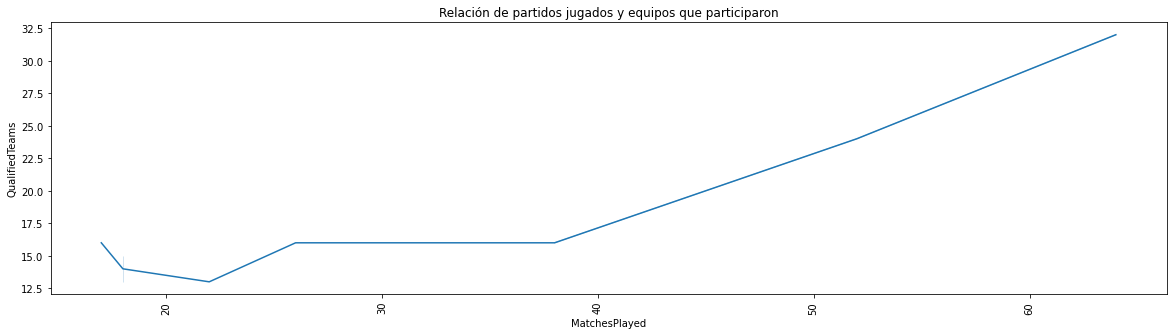

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x = 'MatchesPlayed', y = 'QualifiedTeams', data = df_teams_corr)
plt.xticks(rotation=90)
plt.title("Relación de partidos jugados y equipos que participaron")
plt.show()

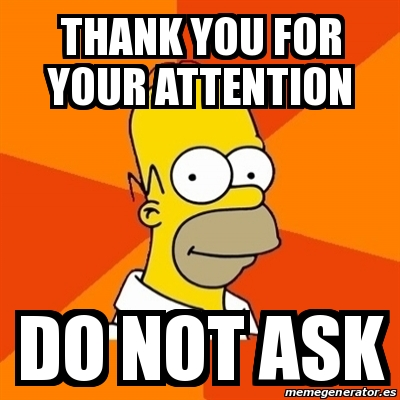